Beast Analytics
===============

Single output file analise
--------------------------

1. Output file to analise

In [1]:
file_name = 'datasets/sample.csv'

2. Load pakages and functions

In [2]:
import pandas as pd
import seaborn as sea
from datetime import datetime
import numpy as np

# to_datetime converts str dates to datetime objects
def to_datetime(value: str) -> datetime:
    return datetime.strptime(value[:19], '%Y-%m-%d %H:%M:%S')

# delta_in_seconds returns the diference beween value and fisrt in seconds 
def delta_in_seconds(value: datetime, first: datetime) -> float:
    delta = value - first
    return delta.total_seconds()

3. Load data

In [3]:
bo = pd.read_csv(file_name)
bo.sample(20)

,Timestamp,Request,Result,StatusCode,IsSuccess,Duration
6426,2020-08-06 23:04:41.455,GET http://127.0.0.1:8080/apps/105,Executed,200,True,40
2651,2020-08-06 23:04:38.365,GET http://127.0.0.1:8080/apps/110,Executed,200,True,145
6081,2020-08-06 23:04:41.133,GET http://127.0.0.1:8080/apps/107,Executed,200,True,96
484,2020-08-06 23:04:36.528,GET http://127.0.0.1:8080/apps/117,Executed,200,True,92
4553,2020-08-06 23:04:39.898,GET http://127.0.0.1:8080/apps/110,Executed,200,True,92
3638,2020-08-06 23:04:39.174,GET http://127.0.0.1:8080/apps/112,Executed,200,True,111
4724,2020-08-06 23:04:40.068,GET http://127.0.0.1:8080/apps/103,Executed,200,True,51
6469,2020-08-06 23:04:41.433,GET http://127.0.0.1:8080/apps/114,Executed,200,True,91
9219,2020-08-06 23:04:43.46,GET http://127.0.0.1:8080/apps/112,Executed,200,True,59
4513,2020-08-06 23:04:39.911,GET http://127.0.0.1:8080/apps/108,Executed,200,True,50


4. Some info aboud the data

In [4]:
bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   10000 non-null  object
 1   Request     10000 non-null  object
 2   Result      10000 non-null  object
 3   StatusCode  10000 non-null  int64 
 4   IsSuccess   10000 non-null  bool  
 5   Duration    10000 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 400.5+ KB


5. Data convertion and separation

In [5]:
bo['TimestampBySecond'] = bo.Timestamp.apply(to_datetime)
first_datetime = bo.TimestampBySecond.min()
bo['ExecutionPace'] = bo.TimestampBySecond.apply(delta_in_seconds, args=(first_datetime,))
bos = bo[bo.IsSuccess]
bof = bo[~bo.IsSuccess]
bofc = bof[bof.Result != 'Executed']
bofs = bof[bof.Result == 'Executed']

6. Success stats

In [6]:
bos.Duration.describe(percentiles=[.20, .40, .60, .80, .90, .95, .99])

count    10000.000000
mean        77.591700
std         30.183285
min         25.000000
20%         52.000000
40%         66.000000
50%         71.000000
60%         79.000000
80%         98.000000
90%        117.000000
95%        136.000000
99%        176.000000
max        316.000000
Name: Duration, dtype: float64

In [7]:
bos.groupby('StatusCode').Duration.agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
StatusCode,,
200,77.5917,10000


7. Success chart

[Text(0.5, 1.0, 'Average Request Duration Second by Second'),
 Text(0.5, 0, 'Execution (second by second)'),
 Text(0, 0.5, 'Duration (ms)')]

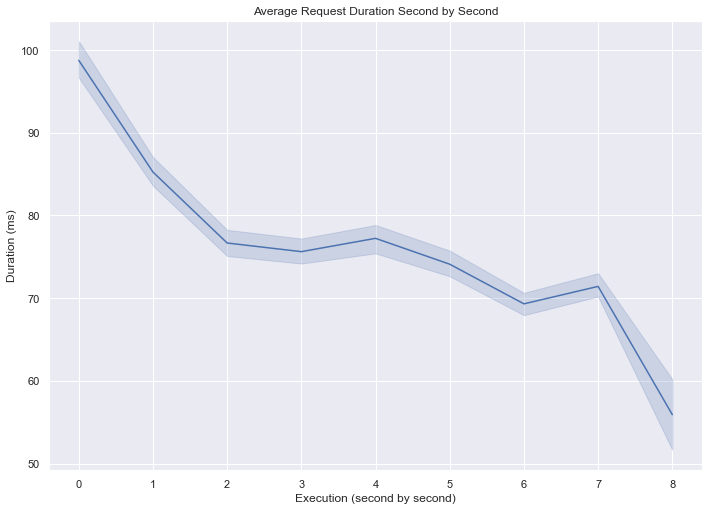

In [8]:
sea.set(
    style="darkgrid", 
    rc={'figure.figsize':(11.7,8.27)}
)
img=sea.lineplot(
    x="ExecutionPace", 
    y="Duration", 
    estimator=np.average, 
    data=bos,
)
img.set(
    title='Average Request Duration Second by Second', 
    xlabel='Execution (second by second)', 
    ylabel='Duration (ms)'
)

8. Client side errors

In [9]:
bofc.groupby('Result').Timestamp.count().sort_values(ascending=False)

Series([], Name: Timestamp, dtype: int64)

9. Server side errors

In [10]:
bofs.groupby('StatusCode').Timestamp.count().sort_values(ascending=False)

Series([], Name: Timestamp, dtype: int64)